In [216]:
#.json to csv
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

data = getDF('Electronics_5.json.gz')

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
import math

In [218]:
data

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,67,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3.0,5,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5.0,4,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5.0,13,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3.0,8,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6739585,4.0,NaN,True,"03 21, 2017",A33MAQA919J2V8,B01HJH40WU,NaN,Kurt Wurm,"These seem like quality USB cables, time will ...",Four Stars,1490054400,NaN
6739586,4.0,NaN,True,"01 9, 2017",A1AKHSCPD1BHM4,B01HJH40WU,NaN,C.L Momof3,"Works great, love the longer cord. As with any...",Nice long cord,1483920000,NaN
6739587,5.0,2,True,"12 1, 2016",A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400,NaN
6739588,5.0,2,True,"11 29, 2016",AJJ7VX2L91X2W,B01HJH40WU,NaN,Faith,Works well.,Five Stars,1480377600,NaN


In [219]:
#drop columns im not using for npl
data.drop(columns = ['reviewTime','reviewerID','asin','style','reviewerName','unixReviewTime','image'],inplace = True)

In [220]:
data.isnull().sum()/data.shape[0]

overall       0.000000
vote          0.859239
verified      0.000000
reviewText    0.000201
summary       0.000120
dtype: float64

In [221]:
data.drop(columns = ["vote"],inplace = True)

In [222]:
data.dropna(axis = 0, how='any',inplace=True )

In [223]:
#sample to make graphs and make things faster since dataset is too big for my pc
sample = data.sample(frac = 0.1 , replace=False, axis=0)

In [224]:
print("Data Size:   " , data.shape[0])
print("Sample Size: " , sample.shape[0])

Data Size:    6737497
Sample Size:  673750


In [225]:
data.isnull().sum()/data.shape[0]

overall       0.0
verified      0.0
reviewText    0.0
summary       0.0
dtype: float64

In [226]:
sample.isnull().sum()/sample.shape[0]

overall       0.0
verified      0.0
reviewText    0.0
summary       0.0
dtype: float64

In [227]:
sample.overall.value_counts()

5.0    432100
4.0    113722
3.0     50446
1.0     46988
2.0     30494
Name: overall, dtype: int64

In [228]:
sample.verified.value_counts()

True     603312
False     70438
Name: verified, dtype: int64

In [229]:
sample.dtypes

overall       float64
verified         bool
reviewText     object
summary        object
dtype: object

Text(0.5, 1.0, 'Distribution of Ratings in Sample')

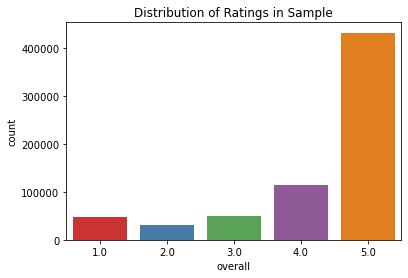

In [230]:
#rating distribution
sns.countplot(x="overall", data=sample,palette="Set1").set_title("Distribution of Ratings in Sample")

Text(0.5, 1.0, 'Distribution of Verified in Sample')

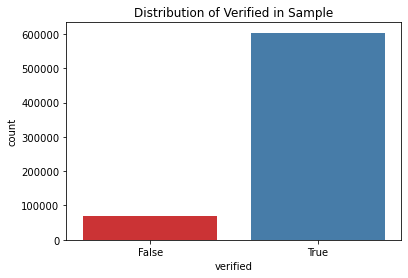

In [231]:
# distribution of verified comments
sns.countplot(x="verified", data=sample,palette="Set1").set_title("Distribution of Verified in Sample")

In [232]:
def Show_Comments_Rating(rating,data_local):
    
    data_Sample = data_local[data_local.overall == rating]
    return data_Sample

def Show_verified_ratings(rating,data_local):
    "Returns percentaje of verified observations and dataframe filtered base on provided rating"
    data_comments = Show_Comments_Rating(rating,data_local)
    data_verified = round(data_comments.verified.value_counts(normalize = True),2)
    return data_comments,data_verified

In [233]:
a,b = Show_verified_ratings(1,sample) 
print(b)
a.head(10)

True     0.83
False    0.17
Name: verified, dtype: float64


,overall,verified,reviewText,summary
6032497,1.0,False,These are not very well made. Bluetooth range ...,Bluetooth range was not very good. Mine stoppe...
6442818,1.0,True,I have just received this power source and dis...,"Beware this is ""A Very Used and not New power..."
6649749,1.0,True,"If you buy it, you will regret it. I have owne...",Touch pad is useless. I use a mouse
3256339,1.0,True,"Had to reboot it several times, the printer co...","and it seems a tad better, but confidence is l..."
5438594,1.0,True,I expected a new replacement but got a refurbi...,One Star
327057,1.0,True,400 watts of crap. Actual watts maybe 20. they...,One Star
2313557,1.0,True,"Just like a lot of others have stated here, It...",Didn't work for me
23619,1.0,True,"It was the wrong item, I returned it",One Star
6308937,1.0,True,junk,One Star
1872055,1.0,True,Doesn't work,Doesn't work


In [234]:
a,b = Show_verified_ratings(2,sample)
print(b)
a.head(10)

True     0.85
False    0.15
Name: verified, dtype: float64


,overall,verified,reviewText,summary
3516324,2.0,True,I plugged it in to a NAS unit. I could not see...,I plugged it in to a NAS unit. I ...
1332682,2.0,True,I will make this short....\n\nPro\nDid not cos...,"Plays well, but everything else is junk on it"
6296928,2.0,True,Slow and if disconnected by power off the hard...,Two Stars
2458113,2.0,True,Stopped working after about a year+. No longer...,Stopped working after about a year+. No longer...
5105340,2.0,True,"Works well for what I wanted. Flimsy, doesn't ...",doesn't feel nice. Constantly slipping off nec...
6229556,2.0,True,"I recieved the wrong product, but was able to ...",recieved wrong product
6461673,2.0,False,I found it impossible to fit the HDMI cables i...,Extremely disappointed. They should have cut o...
2794442,2.0,True,"Quite temperamental, caused quite a few issues...","Quite temperamental, caused quite a few issues..."
3180750,2.0,True,Does not work I would connect my TV to pc and ...,Boo
5313440,2.0,True,No use for it. Letter keys don't work with my ...,Two Stars


In [235]:
a,b = Show_verified_ratings(3,sample) 
print(b)
a

True     0.87
False    0.13
Name: verified, dtype: float64


,overall,verified,reviewText,summary
3055947,3.0,True,Channel strength is okay. Got BEAT out by 1by...,"If it recieved channels as much as it cost, It..."
4262908,3.0,False,I am disappointed as I had a Tab 2 that works...,Samsung cant shut it off.
5372389,3.0,True,good product I personally wanted more sound an...,Three Stars
244725,3.0,True,"They're fine, but why are they so expensive? I...",Too much money.
2996560,3.0,True,ok,Three Stars
...,...,...,...,...
333151,3.0,True,I tried this based on a lot of good reviews. ...,Better than the flat RCA antenna
6278515,3.0,False,I did not realize that these cables only work ...,Only for PCs
5432770,3.0,True,Purchased this item because I did not want to ...,(which appear to be working as expected) so I ...
4747082,3.0,True,BEWARE YOU MAY BE ON THE PHONE WITH TECH SUPPO...,BEWARE REGISTERED MAC ADDRESSES


In [236]:
a,b = Show_verified_ratings(4,sample) 
print(b)
a.head(10)

True     0.88
False    0.12
Name: verified, dtype: float64


,overall,verified,reviewText,summary
1047500,4.0,False,I initially wrote this the day after I install...,This is the one I will be keeping!
1550280,4.0,True,"Cell service here is marginal at best, so gene...",Great for multitasking! Jack is the perfectf f...
3768695,4.0,True,Sometimes has a problem receiving the IR signal,Four Stars
1893319,4.0,True,"Yes, it's very expensive but I have reason to ...",go ahead- pay the Apple tax
1009521,4.0,True,I am pleased with the purchase of the product ...,Walkman
300395,4.0,True,I do like the storage boxes for the storage of...,Needed the DVD storage boxes to hold more DVDs
6100981,4.0,False,It's been some time since I first encountered ...,"My favorite webcam, even 10 years later"
5387827,4.0,True,The cable works great I tested it with my lapt...,The cable works great I tested it with my lapt...
3739250,4.0,True,Good produts,Nice hp
4342986,4.0,True,no issues for me,Four Stars


In [237]:
a,b = Show_verified_ratings(5,sample) 
print(b)
a.head(10)

True     0.91
False    0.09
Name: verified, dtype: float64


,overall,verified,reviewText,summary
5009011,5.0,True,Can say it does as advertised. Good remote cat...,Works
4673992,5.0,True,Works well with my headphones,Five Stars
2878552,5.0,True,Excellent product. Works perfectly.\n#14463#,Five Stars
4618731,5.0,True,I needed a good pair of headphones (as I can't...,I needed a good pair of headphones (as I can't...
4925063,5.0,True,this unit is being used to retrieve older phot...,It is working great.
4424093,5.0,True,I love this bag. I used it for my Macbook Pro ...,I love this bag
4881690,5.0,False,"<div id=""video-block-R97Y38JMW4YCI"" class=""a-s...",Pleasantly surprised with the quality and value
1329916,5.0,True,I have been using this CD/DVD drive for over a...,excellent and reliable CD/DVD drive
4761722,5.0,True,Bought it to go with the JBL speaker I bought ...,Works beautifully
6650259,5.0,True,Correct size belt. Music still seems to be pit...,High quality belt for lower end tables


In [240]:
#more non verified people give negative reviews
# ratings 4 & 5 = good. ratings 1,2 & 3 = bad. 

In [242]:
data["Binary_Overall"] = np.NaN
data["Binary_Overall"] = np.where((data.overall == 5) | (data.overall == 4) ,1,data.Binary_Overall)
data.Binary_Overall.fillna(0,inplace = True)

In [243]:
a,b = Show_verified_ratings(1,data) 
a.head(3)

,overall,verified,reviewText,summary,Binary_Overall
29,1.0,True,Volume buttons were dead on arrival. be aware ...,One Star,0.0
55,1.0,True,Works great when I tape up the plug to the po...,plug falls out,0.0
56,1.0,True,Did not work. I'm sure the seller knew this be...,Do not buy!,0.0


In [244]:
a,b = Show_verified_ratings(5,data) 
a.head(3)

,overall,verified,reviewText,summary,Binary_Overall
0,5.0,True,This is the best novel I have read in 2 or 3 y...,A star is born,1.0
2,5.0,False,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1.0
3,5.0,False,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,1.0


Text(0.5, 1.0, 'Distribution of Positive and negatives reviews in data')

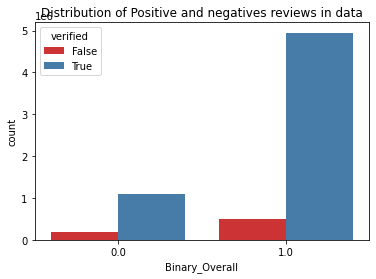

In [245]:
sns.countplot(x="Binary_Overall", data=data,palette="Set1",hue = "verified").set_title("Distribution of Positive and negatives reviews in data")

In [246]:
#import the csv
data.to_csv("Data.csv")